In [1]:
!pip install pandas_datareader

In [2]:
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.core.common.is_list_like = pd.api.types.is_list_like

In [3]:
start = '1928-10-01'
end = '2007-12-31'
df = data.DataReader('^DJI', 'stooq',start,end)
# データフレームから "Close" 列のみを抽出する
close_prices = df["Close"]

# 結果を表示する
print(close_prices)
start = '1984-01-04'
end = '2007-07-30'
df1 = data.DataReader('^NKX', 'stooq',start,end)
# データフレームから "Close" 列のみを抽出する
close_prices1 = df1["Close"]

# 結果を表示する
print(close_prices1)

Date
2007-12-31    13264.8
2007-12-28    13365.9
2007-12-27    13359.6
2007-12-26    13551.7
2007-12-24    13549.3
               ...   
1928-10-05      240.4
1928-10-04      240.0
1928-10-03      237.8
1928-10-02      238.1
1928-10-01      240.0
Name: Close, Length: 20967, dtype: float64
Date
2007-07-30    17289.30
2007-07-27    17283.81
2007-07-26    17702.08
2007-07-25    17858.41
2007-07-24    18002.02
                ...   
1984-01-10    10016.00
1984-01-09     9954.00
1984-01-06     9961.00
1984-01-05     9947.00
1984-01-04     9927.00
Name: Close, Length: 5865, dtype: float64


In [4]:
import pandas as pd
import numpy as np

# DataFrame df が与えられていると仮定します
# ここでは適当なデータを使用します

# 対数収益率の計算
log_returns = np.log(df1['Close'] / df1['Close'].shift(1)).dropna()

# 対数収益率の平均と標準偏差の推定
mean_log_return = log_returns.mean()
std_log_return = log_returns.std()

# 結果の表示
print("Estimated mean of log returns:", mean_log_return)
print("Estimated standard deviation of log returns:", std_log_return)


Estimated mean of log returns: -9.461621682095517e-05
Estimated standard deviation of log returns: 0.013507231099931105


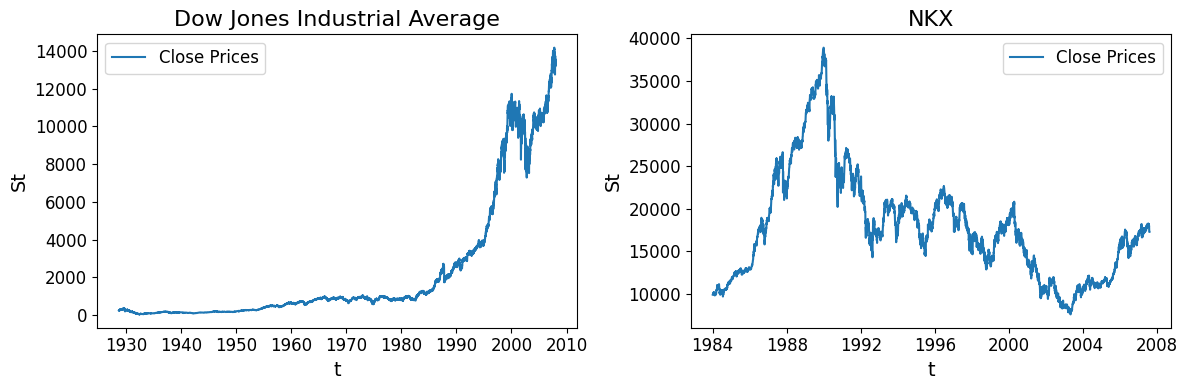

In [5]:
import matplotlib.pyplot as plt

# グラフを並べるためのサブプロットを作成
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# 1つ目のグラフをプロット
axes[0].plot(close_prices.index, close_prices, label="Close Prices")
axes[0].set_title('Dow Jones Industrial Average', fontsize=16)
axes[0].set_xlabel('t', fontsize=14)
axes[0].set_ylabel('St', fontsize=14)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[0].legend(fontsize=12)

# 2つ目のグラフをプロット
axes[1].plot(close_prices1.index, close_prices1, label="Close Prices")
axes[1].set_title('NKX', fontsize=16)
axes[1].set_xlabel('t', fontsize=14)
axes[1].set_ylabel('St', fontsize=14)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].legend(fontsize=12)

# グラフを表示
plt.tight_layout()
plt.show()


# 価格差（階差）

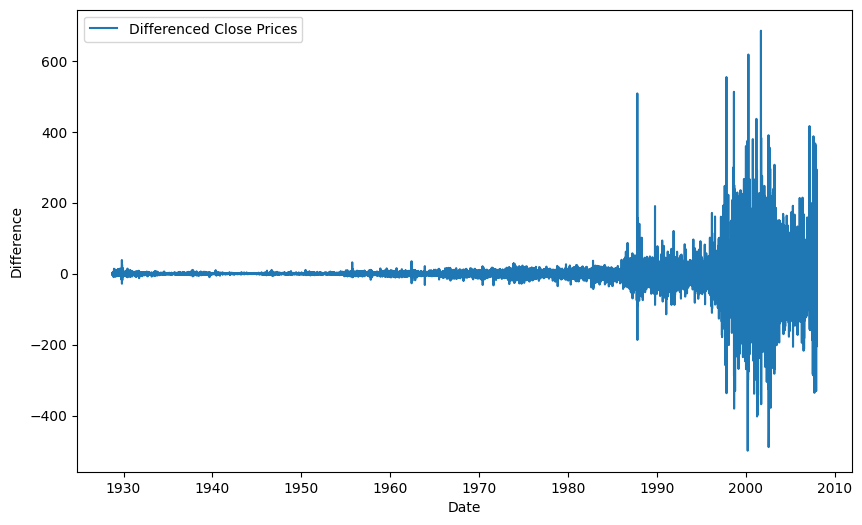

In [6]:
import matplotlib.pyplot as plt

# closeの差分を計算してclose_diffというSeriesを作成
close_diff = df['Close'].diff().dropna()

# グラフをプロットする
plt.figure(figsize=(10, 6))
plt.plot(close_diff.index, close_diff, label="Differenced Close Prices")
plt.xlabel('Date')
plt.ylabel('Difference')
plt.legend()
plt.show()


# 割引価格差

# 収益率

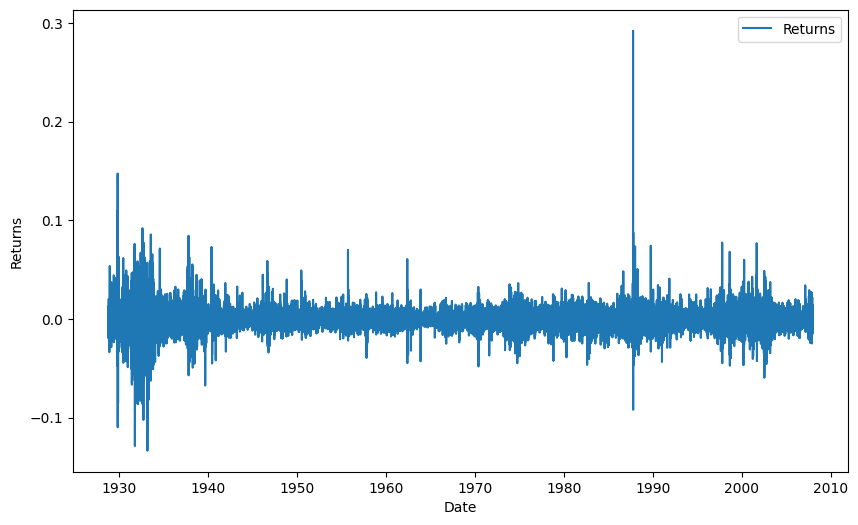

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 株価の収益率を計算する
returns = df["Close"].pct_change()

# 収益率をプロットする
plt.figure(figsize=(10, 6))
plt.plot(returns.index, returns, label="Returns")
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()


# 対数収益率

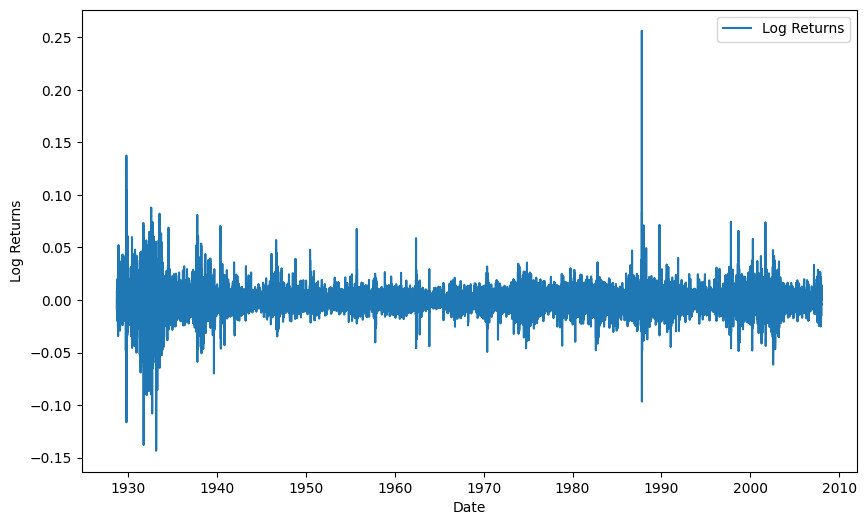

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# DataFrame df が与えられていると仮定します
# ここでは適当なデータを使用します
# dfの"Close"列に株価データが含まれているとします

# 株価の対数収益率を計算する
log_returns = np.log(df["Close"]).diff()

# 対数収益率をプロットする
plt.figure(figsize=(10, 6))
plt.plot(log_returns.index, log_returns, label="Log Returns")
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend()
plt.show()


# 株価収益率のボラティリティー
5740営業日における日経225の価格を用いて、10営業日で計算した収益率のボラティリティーの日次推移を求めるとは？
日経225の価格データを取得します。
10営業日ごとに、その期間内の収益率を計算します。
各10営業日ごとの収益率の標準偏差（または分散）を計算し、それをボラティリティとして扱います。
その結果を日次の推移としてプロットします。


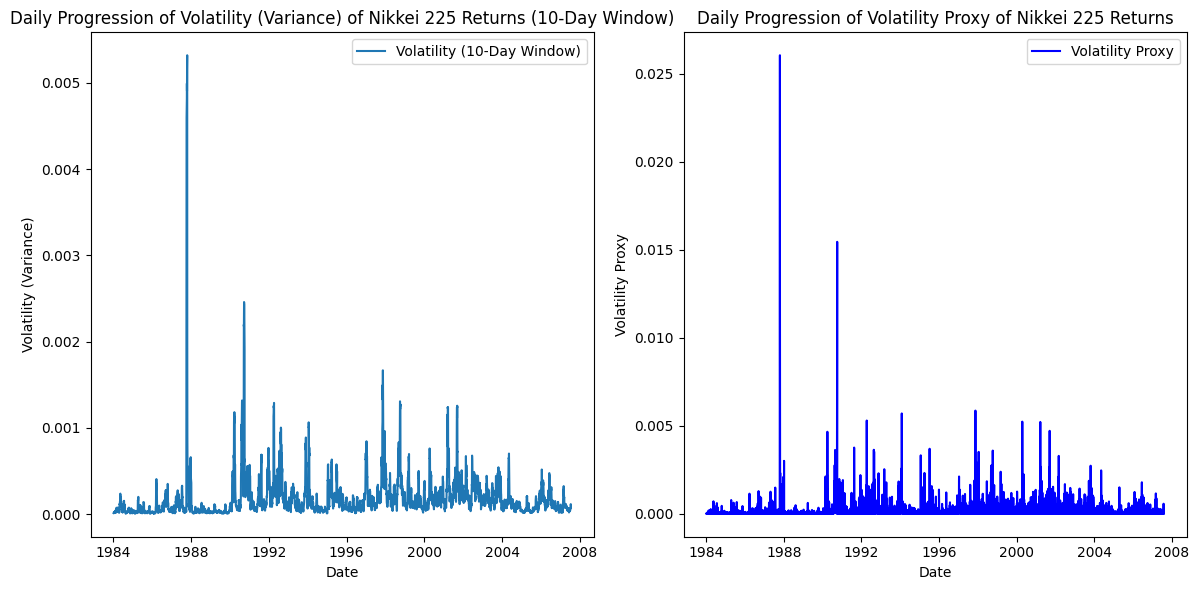

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1つ目のグラフ：収益率のボラティリティ（分散）の計算とプロット
window = 10
returns = df1['Close'].pct_change().dropna()
volatility = returns.rolling(window).var()
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # 1行2列の1番目のサブプロット
plt.plot(volatility.index, volatility, label="Volatility (10-Day Window)")
plt.xlabel('Date')
plt.ylabel('Volatility (Variance)')
plt.title('Daily Progression of Volatility (Variance) of Nikkei 225 Returns (10-Day Window)')
plt.legend()

# 2つ目のグラフ：対数収益率のボラティリティー代理変数の計算とプロット
log_returns = np.log(df1['Close']).diff()
volatility_proxy = log_returns**2

plt.subplot(1, 2, 2)  # 1行2列の2番目のサブプロット
plt.plot(volatility_proxy.index, volatility_proxy, label="Volatility Proxy", color="blue")
plt.xlabel('Date')
plt.ylabel('Volatility Proxy')
plt.title('Daily Progression of Volatility Proxy of Nikkei 225 Returns')
plt.legend()

plt.tight_layout()  # グラフが重ならないように自動調整
plt.show()


<Figure size 1000x600 with 0 Axes>

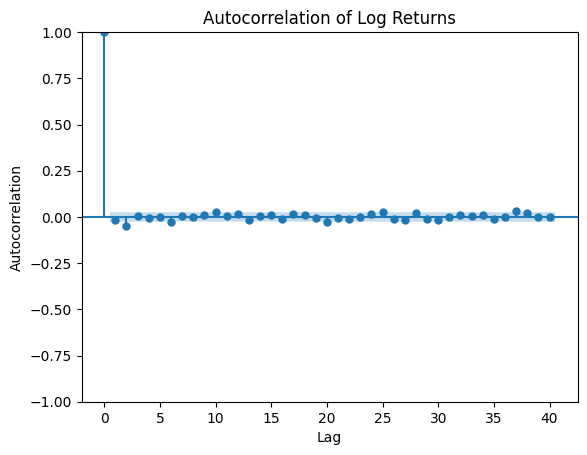

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# 対数収益率の計算
log_returns = np.log(df1['Close']).diff().dropna()

# 自己相関のプロット
plt.figure(figsize=(10, 6))
plot_acf(log_returns, lags=40, alpha=0.05)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Log Returns')
plt.show()

Date
2007-07-13    0.000079
2007-07-12    0.000115
2007-07-11    0.000066
2007-07-10    0.000071
2007-07-09    0.000066
                ...   
1984-01-10    0.000022
1984-01-09    0.000018
1984-01-06    0.000015
1984-01-05    0.000012
1984-01-04    0.000012
Name: Close, Length: 5855, dtype: float64


<Figure size 1000x600 with 0 Axes>

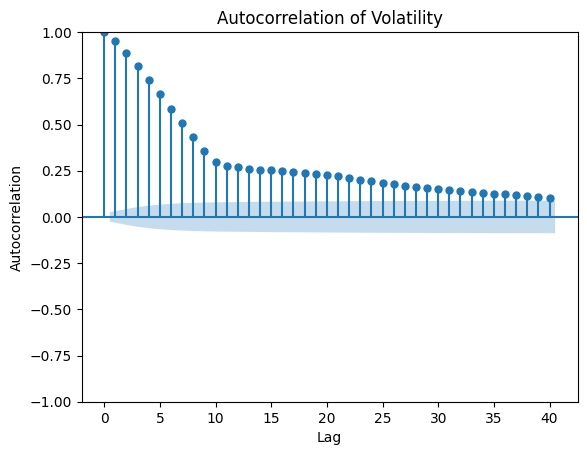

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# 対数収益率の計算
log_returns = np.log(df1['Close']).diff().dropna()

# 対数収益率のボラティリティ（分散）の計算
window = 10
volatility = log_returns.rolling(window).var()

# 欠損値を削除
volatility = volatility.dropna()
print(volatility)

# ボラティリティの自己相関のプロット
plt.figure(figsize=(10, 6))
plot_acf(volatility, lags=40, alpha=0.05)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Volatility')
plt.show()

# 自己回帰モデル

In [12]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# DataFrame df が与えられていると仮定します
# ここでは適当なデータを使用します

# AIC値を格納する空のリストを作成
AIC_values = []

# pとqの値が0から2の範囲でループ
for p in range(3):
    for q in range(3):
        # ARIMAモデルを作成し、適合させる
        model = ARIMA(df1["Close"], order=(p, 1, q))
        fit_model = model.fit()

        # AIC値を取得し、リストに追加
        AIC = fit_model.aic
        AIC_values.append((p, q, AIC))

# AIC値をすべて表示
print("AIC values:")
for p, q, AIC in AIC_values:
    print(f"ARIMA({p},1,{q}) AIC: {AIC}")

# 最小のAIC値に対応するモデルを選択
best_model = min(AIC_values, key=lambda x: x[2])
print("\nBest ARIMA(p,1,q) model:", best_model)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

AIC values:
ARIMA(0,1,0) AIC: 81239.92099408088
ARIMA(0,1,1) AIC: 81241.88459396144
ARIMA(0,1,2) AIC: 81228.35952828114
ARIMA(1,1,0) AIC: 81241.88845220616
ARIMA(1,1,1) AIC: 81239.76337498068
ARIMA(1,1,2) AIC: 81230.30695155298
ARIMA(2,1,0) AIC: 81227.90449434958
ARIMA(2,1,1) AIC: 81229.87144004229
ARIMA(2,1,2) AIC: 81228.01592537524

Best ARIMA(p,1,q) model: (2, 0, 81227.90449434958)


In [13]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# DataFrame df が与えられていると仮定します
# ここでは適当なデータを使用します

# AIC値を格納する空のリストを作成
AIC_values = []

# pとqの値が0から2の範囲でループ
for p in range(3):
    for q in range(3):
        # ARMAモデルを作成し、適合させる
        model = ARIMA(log_returns, order=(p, 0, q))
        fit_model = model.fit()

        # AIC値を取得し、リストに追加
        AIC = fit_model.aic
        AIC_values.append((p, q, AIC))

# AIC値をすべて表示
print("AIC values:")
for p, q, AIC in AIC_values:
    print(f"ARMA({p},{q}) AIC: {AIC}")

# 最小のAIC値に対応するモデルを選択
best_model = min(AIC_values, key=lambda x: x[2])
print("\nBest ARMA(p,q) model:", best_model)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

AIC values:
ARMA(0,0) AIC: -33839.21556733542
ARMA(0,1) AIC: -33838.6076788623
ARMA(0,2) AIC: -33850.04475729306
ARMA(1,0) AIC: -33838.47850605108
ARMA(1,1) AIC: -33838.06860167624
ARMA(1,2) AIC: -33848.3059215995
ARMA(2,0) AIC: -33849.96847663514
ARMA(2,1) AIC: -33848.11571289894
ARMA(2,2) AIC: -33846.77383741329

Best ARMA(p,q) model: (0, 2, -33850.04475729306)


In [14]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# DataFrame df が与えられていると仮定します
# ここでは適当なデータを使用します

# ARMA(1,2)モデルを作成し、最尤推定を行う
model = ARIMA(log_returns, order=(1, 0, 2))
fit_model = model.fit()

# 推定されたパラメータを表示
print("Estimated parameters:")
print("AR parameter:", fit_model.params[1])
print("MA parameters:", fit_model.params[2:])

# 推定されたパラメータの標準誤差を表示
print("Standard errors:")
print("AR parameter standard error:", fit_model.bse[1])
print("MA parameters standard errors:", fit_model.bse[2:])


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Estimated parameters:
AR parameter: -0.1288822137253635
MA parameters: ma.L1     0.113506
ma.L2    -0.050348
sigma2    0.000182
dtype: float64
Standard errors:
AR parameter standard error: 0.1899075935449018
MA parameters standard errors: ma.L1     0.189592
ma.L2     0.009689
sigma2    0.000002
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

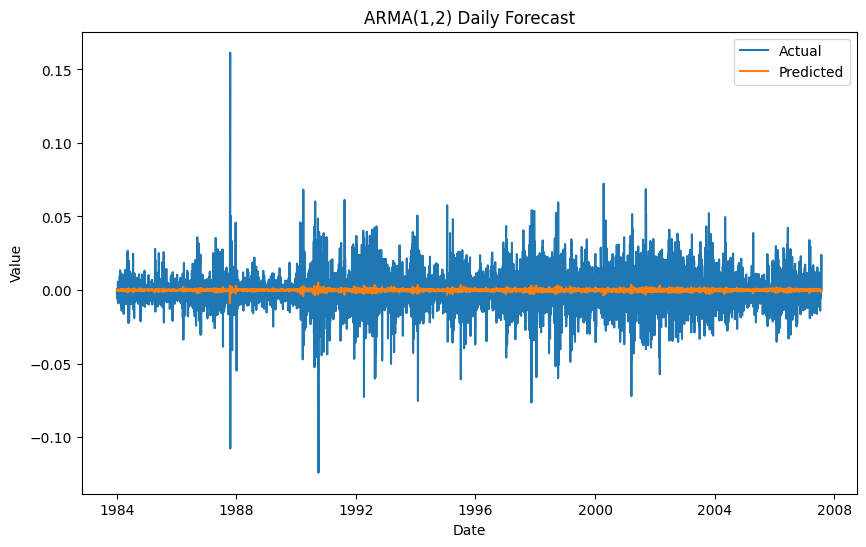

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# DataFrame df が与えられていると仮定します
# ここでは適当なデータを使用します

# ARMA(1,2)モデルを作成し、最尤推定を行う
model = ARIMA(log_returns, order=(1, 0, 2))
fit_model = model.fit()

# モデルを使用して日次推移を予測する
predicted_values = fit_model.predict(start=log_returns.index[0], end=log_returns.index[-1])

# 実際のデータと予測値をプロットする
plt.figure(figsize=(10, 6))
plt.plot(log_returns.index, log_returns, label='Actual')
plt.plot(log_returns.index, predicted_values, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARMA(1,2) Daily Forecast')
plt.legend()
plt.show()


# 標準ブラウン運動

In [16]:
# 対数収益率の平均と標準偏差の推定

log_returns = np.log(df1['Close'] / df1['Close'].shift(1)).dropna()
mean_log_return = log_returns.mean()
std_log_return = log_returns.std()

# 結果の表示
print("Estimated mean of log returns:", mean_log_return)
print("Estimated standard deviation of log returns:", std_log_return)


Estimated mean of log returns: -9.461621682095517e-05
Estimated standard deviation of log returns: 0.013507231099931105


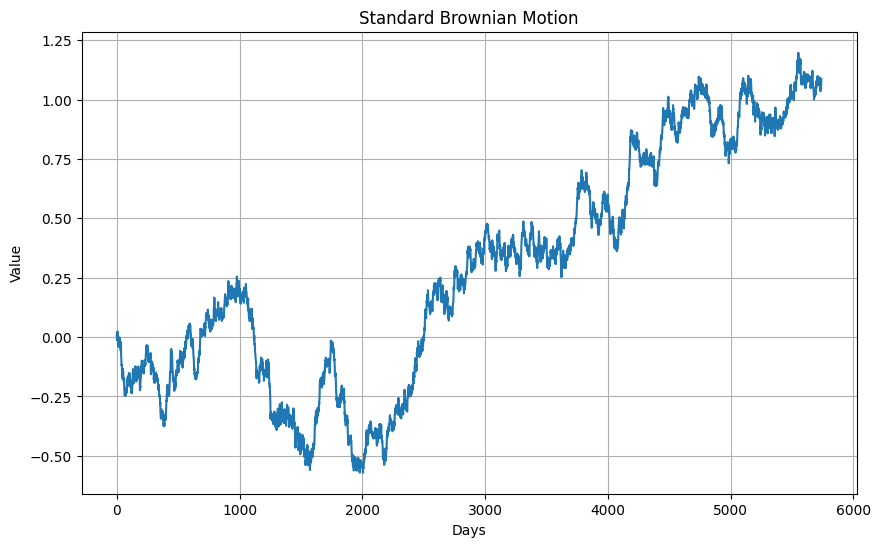

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# パラメータを設定
mean = 9.77e-05  # 平均
std =  1.36e-02    # 標準偏差
days =  5740  # 日数

# 標準ブラウン運動を生成
brownian_motion = np.random.normal(mean, std, days).cumsum()

# 標準ブラウン運動のプロット
plt.figure(figsize=(10, 6))
plt.plot(brownian_motion)
plt.xlabel('Days')
plt.ylabel('Value')
plt.title('Standard Brownian Motion')
plt.grid(True)
plt.show()
